# Introduction to Data Science



## Instructor

    Dr. Fatima Boukari
    Division: PEMaCS
    
    
 



# Encoding methods comparison Label vs OneHot Encoder
Encoders are very important for ML prediction model. Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. In ML models we are often required to convert the categorical i.e text features to its numeric representation. The two most common ways to do this is to use Label Encoder or OneHot Encoder. However, most of the ML newbies are not familiar with the impact of the choice of encoding has on their model, the accuracy of the model may shift by large numbers by using the right encoding at the right scenario.
Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. Ml models understand numbers. Tha's the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.

Categorical encoding is a process of converting categories to numbers. 
## Different Approaches to Categorical Encoding
There are multiple ways of handling Categorical variables. The two most widely used techniques:

    - Label Encoding
    - One-Hot Encoding
We will see here the Label and OneHot Encoding impact on prediction accuracy.

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline
import os
currentdirectory = os.getcwd()


In [203]:
# Loading the data set:
credit = pd.read_csv('Credit.csv')
print(credit.shape)
credit.head()

(682, 22)


,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
2,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
3,3115687,none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,...,unknown-none,35,none,for free,1,unskilled-resident,2,yes,yes,0
4,8251714,none,24,current loans paid,furniture/equipment,2835,500 - 1000 DM,>= 7 years,3,male-single,...,building society savings/life insurance,53,none,own,1,skilled,1,none,yes,0


Q1: Show the number of rows per credit type (bad_credit 0 or 1):

In [204]:
# solution
# write you code here
# Q1: Show the number of rows per credit type (bad_credit 0 or 1):

credit['bad_credit'].value_counts()


bad_credit
0    402
1    280
Name: count, dtype: int64

## Prepare data for scikit-learn model

Q2: Create the numpy array of the label values required for the scikit-learn model:

In [205]:
# Solution
# Take the "bad_credit" column from the 

labels = np.array(credit['bad_credit'])


Q3: Create the numpy feature array or **model matrix**. Three step process:

1. Encode the categorical string variables as integers.
2. Transform the integer coded variables to dummy variables. 
3. Append each dummy coded categorical variable to the model matrix.  
Logistic regression requires numerical inputs, but the inputs from the datasets are strings. Using the following function, modify it to convert those string categories into numerical values using integer encoding instead of OneHot encoding: 

************************************************************************************
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder() # Creates an object called enc from the LabelEncoder class
    enc.fit(cat_features) # Assigns a numerical value to each string category
    enc_cat_features = enc.transform(cat_features) # Converts the string categories into their assigned numerical values
    ## Now, apply OneHot encoding
    ohe = preprocessing.OneHotEncoder() # Creates an object called ohe from the OneHotEncoder class
    encoded = ohe.fit(enc_cat_features.reshape(-1,1)) # Initializes the outputs by assigning each numerical value to an index
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray() # Converts the numerically encoded values to one-hot encoded values
    # Example: if there are 5 classes: 4 -> [0, 0, 0, 0, 1], 2 -> [0, 0, 1, 0, 0]
categorical_columns = ['credit_history', 'purpose', 'gender_status', 
                       'time_in_residence', 'property']

Features = encode_string(credit['checking_account_status'])
for col in categorical_columns:
    temp = encode_string(credit[col])
    Features = np.concatenate([Features, temp], axis = 1) # Concatenates the features into one input array

# Features contains only the categorical inputs

print(Features.shape)
print(Features[:2, :]) # Displaying 2 first samples
credit.drop('bad_credit', axis=1).head(2)
************************************************************************************

In [206]:
# function to convert string categories into numerical values 
# Note: You can use our Logistic Regression model code from above then modify it by 
# removing the OneHotEncoder.
# Write you code here
# Solution

import numpy as np

def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    return enc_cat_features.reshape(-1,1)

categorical_columns = ['credit_history', 'purpose', 'gender_status', 
                       'time_in_residence', 'property']

Features = encode_string(credit['checking_account_status'])
for col in categorical_columns:
    temp = encode_string(credit[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])
credit.drop('bad_credit', axis=1).head(2)




(682, 6)
[[1 1 7 3 3 2]
 [3 1 4 3 2 2]]


,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,4,real estate,67,none,own,2,skilled,1,yes,yes
1,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,3,real estate,49,none,own,1,unskilled-resident,2,none,yes


Q4: Concatenate the numeric features to the numpy array: 

In [207]:
# solution
# Write your code here

#Q4: Concatenate the numeric features to the numpy array: 
numeric_columns = ['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', "age_yrs"]
numeric_features = credit[numeric_columns].values

Features = np.concatenate([Features, numeric_features], axis=1)
print(Features.shape)
print(Features[:2, :])



(682, 10)
[[   1    1    7    3    3    2    6 1169    4   67]
 [   3    1    4    3    2    2   12 2096    2   49]]


In [208]:
from sklearn.metrics import accuracy_score, classification_report

In [209]:
## We will use the same Random sampling of the cases we used before to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

y = np.ravel(labels)

Q5: Using StandardScaler function from the Scikit Learn preprocessing package to Zscore scale the numeric training features. 

In [210]:
# Solution
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:2, :])


[[-0.34468421  0.11431291 -1.1255457   0.89054376  0.15148194 -0.34876437
  -0.27844135 -0.36056023  0.87758834 -0.39053646]
 [-1.16250638  2.19371915 -1.1255457  -1.27625698 -0.7526759  -1.35047856
   1.13975324  1.4394644  -0.87758834  1.7521555 ]]


Q6: Construct the logistic regression model using `linear_model` package.

Use the `linear_model.LogisticRegression` and increase the number of iterations `max_iter` to 300 or higher so you can have convergence of the model.

In [212]:
# Solution
#Insert your code here

logistic_mod = linear_model.LogisticRegression(max_iter=1500)
logistic_mod.fit(X_train, y_train)


LogisticRegression(max_iter=1500)

Q7: Print the Intercept and the coefficients of the model: 

In [213]:
# solution
# Insert your code here
print(logistic_mod.intercept_ )
print(logistic_mod.coef_)

[-0.5017788]
[[-4.32278832e-01  1.02094351e-01 -6.99765455e-02 -2.10944856e-01
   6.28325038e-02  4.73614758e-03  2.22218306e-02  2.27707650e-05
   3.22290494e-01 -1.61767353e-02]]


Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). Execute the code and the cell below to compute and display a sample of these class probabilities for the test feature set. 

In [214]:
probabilities = logistic_mod.predict_proba(X_test)   # Probabilty good credit [0] and bad credit [1]
print(probabilities[:15,:])

[[0.54857334 0.45142666]
 [0.84036376 0.15963624]
 [0.58215536 0.41784464]
 [0.30392697 0.69607303]
 [0.78672648 0.21327352]
 [0.93651889 0.06348111]
 [0.6007362  0.3992638 ]
 [0.86535442 0.13464558]
 [0.64874541 0.35125459]
 [0.29322295 0.70677705]
 [0.56059951 0.43940049]
 [0.7220954  0.2779046 ]
 [0.64794941 0.35205059]
 [0.74320923 0.25679077]
 [0.52103499 0.47896501]]


The first column is the probability of a score of $0$ and the second column is the probability of a score of $1$. 

Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. A few examples along with the known labels are then displayed. Execute this code and examine the result.

Evaluate the classification model:


In [215]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print("Predicted",np.array(scores[:15])) # Predicted values
print("---------------------------------------------------------------")
print("real  out", y_test[:15]) # Actual values

Predicted [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
---------------------------------------------------------------
real  out [0 1 0 1 0 0 0 0 0 1 1 0 1 0 1]


Some of the positive ($1$) predictions agree with the test labels in the second row, but several do not.


**Confusion matrix**

In [216]:
def print_metrics(labels, scores):  # labels are our data output y_test, scores in result of our prediction
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       145                26
Actual negative        74                55

Accuracy  0.67
 
           Positive      Negative
Num case      171           129
Precision    0.66          0.68
Recall       0.85          0.43
F1           0.74          0.52


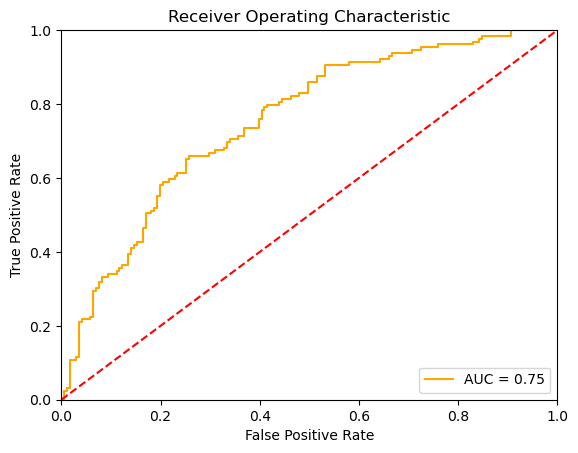

In [217]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

Q8: Compare the results and ROC, AUC with the results obtained using OneHot encoding. The results may not be significant in this problem case it is important to know that ordering patterns of integers leads to lower performance.

You Answer here

Q9: import the necessary libraries to answer the next question: cross validation


In [218]:
# Solution
###########################################    
# from    import
from sklearn.model_selection import KFold



Q10: Split the cases into training and test data sets using Cross-Validation to train and test the model. 

In [219]:
# create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [220]:
# Solution
# to get the values from our data, we use np.take() to access a value at particular index
i = 1
for train_index, test_index in kf3.split(Features):
    X_train = np.take(Features, train_index, axis=0)
    X_test = np.take(Features, test_index, axis=0)
    y_train = np.take(y, train_index, axis=0)
    y_test = np.take(y, test_index, axis=0)
        
    #Train the model
    logistic_mod = linear_model.LogisticRegression(max_iter=2500) 
    logistic_mod.fit(X_train, y_train)

    #model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, logistic_mod.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.4605263157894737
Accuracy for the fold no. 2 on the test set: 0.6784140969162996
Accuracy for the fold no. 3 on the test set: 0.039647577092511016


In [221]:
# Solution
# to get the values from our data, we use np.take() to access a value at particular index
i = 1
for train_index, test_index in kf5.split(Features):
    X_train = np.take(Features, train_index, axis=0)
    X_test = np.take(Features, test_index, axis=0)
    y_train = np.take(y, train_index, axis=0)
    y_test = np.take(y, test_index, axis=0)
        
    #Train the model
    logistic_mod = linear_model.LogisticRegression(max_iter=2500) 
    logistic_mod.fit(X_train, y_train)

    #model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, logistic_mod.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.5912408759124088
Accuracy for the fold no. 2 on the test set: 0.6058394160583942
Accuracy for the fold no. 3 on the test set: 0.6985294117647058
Accuracy for the fold no. 4 on the test set: 0.19852941176470587
Accuracy for the fold no. 5 on the test set: 0.22794117647058823


Note that the results are for the purpose of the homework. In real world applications, we use different experiments using different models.  